# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

training_file = './traffic-signs-data/train.p'
validation_file= './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

n_train = X_train.shape[0]  #Number of training examples
n_test = X_test.shape[0]    #Number of testing examples.
n_validation = X_valid.shape[0]
image_shape = X_train[0].shape #Shape of an traffic sign image?
n_classes = len(np.unique(y_train))   #Number unique classes/labels there are in the dataset.

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import cv2
import random

# Add the SignName Names to Labels
def add_label_names(labels, file_path, column_name):
    sign_names = pd.read_csv(file_path)
    sign_names_df = pd.DataFrame(labels)
    sign_names_df = sign_names_df.merge(sign_names, how='left', on=None, left_on=0, right_on=column_name )
    del sign_names_df[column_name]
    return sign_names_df

#Plot Random signs
def plot_random_signs(n_row,n_col,X,y):

    plt.figure(figsize = (10,10))
    gs1 = gridspec.GridSpec(n_row,n_col)
    gs1.update(wspace=0.1, hspace=0.1)
    
    for i in range(n_row*n_col):
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot])
        plt.text(0,0,str(y[ind_plot][1]), color='k',backgroundcolor='w', va= 'top', )
        plt.axis('off')
    plt.show()

#### Plot Count of SignNames by Type

In [4]:
y_train_w_names = add_label_names(y_train, 'signnames.csv' , 'ClassId' )
y_aggreg = y_train_w_names.groupby('SignName', as_index=False).count()

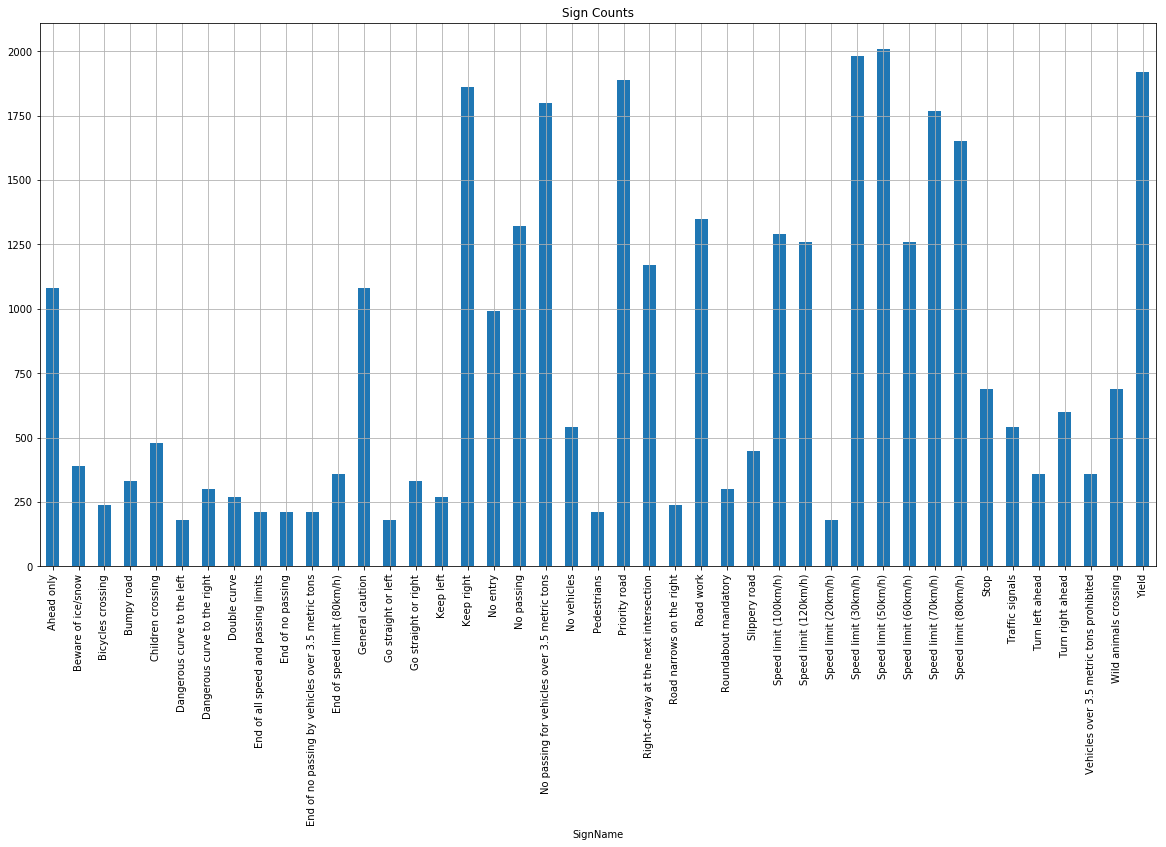

In [5]:
plt.figure();
y_aggreg.plot(x=y_aggreg['SignName'],kind='bar', figsize = (20,10), legend=False, grid=True, title='Sign Counts')

#### Plot Random Signs

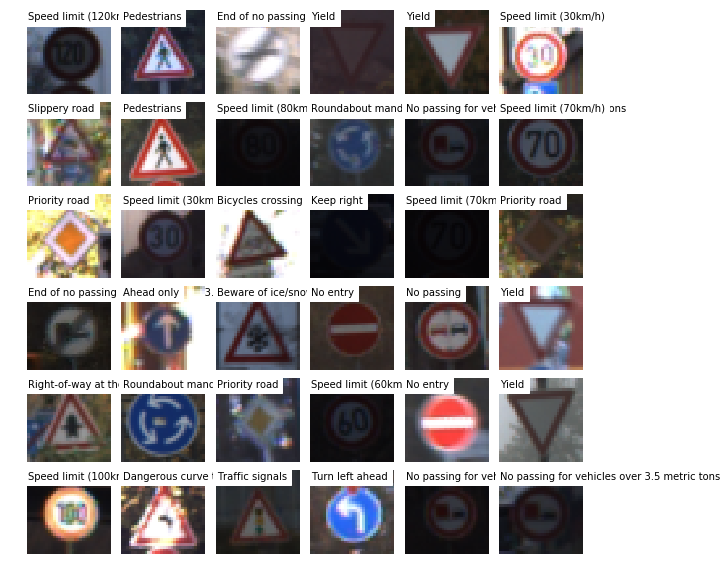

In [6]:
plot_random_signs(6,6,X_train,y_train_w_names.values)


## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Image Augmentation Functions

In [7]:
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    random_bright = .25+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

def transform_image(img,ang_range,shear_range,trans_range):

    # Rotation
    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2
    
    # Brightness 
    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])
    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    img = augment_brightness_camera_images(img)
    
    return img


def augment_images(image, label, ang_range, shear_range, trans_range, augmentation_factor):
    X_train_trans = np.empty([image.shape[0]*augmentation_factor,32,32,3],dtype=np.uint8)
    y_train_trans = np.empty([image.shape[0]*augmentation_factor],dtype=np.uint8)
    for i in range(image.shape[0]):
        for j in range(augmentation_factor):
            image_trans = transform_image(image[i], ang_range, shear_range, trans_range)
            X_train_trans[(augmentation_factor*i)+j,:,:,:] = image_trans
            y_train_trans[(augmentation_factor*i)+j] = label[i]
    X_train_augmented = np.concatenate((image, X_train_trans), axis=0)
    y_train_augmented = np.append(label, y_train_trans)
    return X_train_augmented, y_train_augmented


#### Augment Images

In [8]:
augmentation_factor = 3
X_train_augm, y_train_augm = augment_images(X_train, y_train, 30, 2, 2, augmentation_factor)
y_train_augm_w_names = add_label_names(y_train_augm, 'signnames.csv' , 'ClassId' )

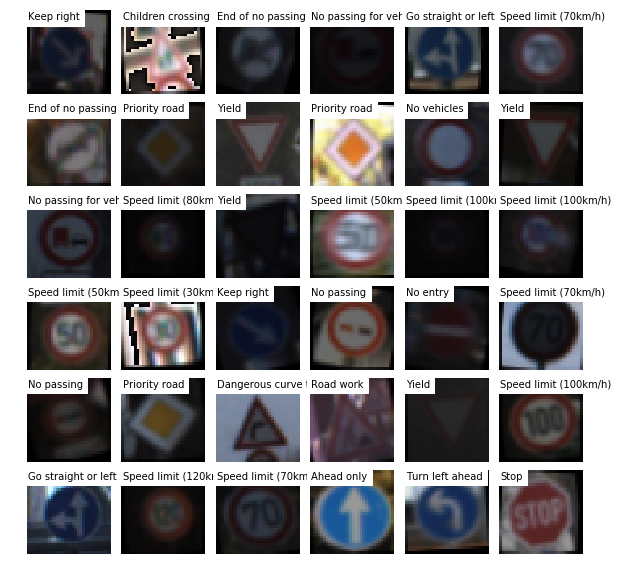

In [9]:
plot_random_signs(6, 6, X_train_augm,y_train_augm_w_names.values)

#### Image Processing functions

In [10]:
def rgb2gray(image):
    r, g, b = image[:,:,:,0], image[:,:,:,1], image[:,:,:,2]
    image_grayed = r*0.299 + g*0.587 + b*0.114
    image_grayed = np.reshape(image_grayed, (-1, 32, 32, 1))  #reshape matrix to fix conv layer (32,32) to (32,32,1)
    return image_grayed

def normalize(x):
    x_min = 0
    x_max = 255
    x_norm = (x - x_min)/(x_max-x_min)
    return x_norm

def preprocess_image(image):
    image2gray = rgb2gray(image)
    image_normalized = normalize(image2gray)
    return image_normalized

In [11]:
X_train_pro = preprocess_image(X_train_augm)
y_train_pro = y_train_augm
X_valid_pro = preprocess_image(X_valid)
X_test_pro = preprocess_image(X_test)

print ('Train images has been processed.  New shape is {}'.format(X_train_pro.shape))
print ('Train labes has been processed. New shape is {}'.format(y_train_pro.shape))
print ('Validation has been processed.  New shape is {}'.format(X_valid_pro.shape))
print ('Test images has been processed.  New shape is {}'.format(X_test_pro.shape))

Train images has been processed.  New shape is (139196, 32, 32, 1)
Train labes has been processed. New shape is (139196,)
Validation has been processed.  New shape is (4410, 32, 32, 1)
Test images has been processed.  New shape is (12630, 32, 32, 1)


#### Plot sample pre-post image

In [12]:
from random import randint
import math

def plot_prepost_images(X_pre_image, X_post_image, y_pre_image):    
    plt.figure(figsize = (10,3))
    gs1 = gridspec.GridSpec(2,6)
    gs1.update(wspace=0.1, hspace=0.1)
    
    for i in range(6):
        image_num  = randint(0,X_pre_image.shape[0])
        if image_num > n_train:
            img = math.floor((image_num-n_train)/augmentation_factor)
        else:
            img = image_num
        ax1 = plt.subplot(gs1[i])
        image = X_pre_image[img].squeeze()
        label = y_pre_image[img]
        plt.text(0,0,str(label[1]), color='k',backgroundcolor='w', va= 'top', )
        plt.imshow(image, cmap="gray")
        plt.axis('off')
        ax2 = plt.subplot(gs1[i+6])
        image_processed = X_post_image[image_num].squeeze()
        plt.imshow(image_processed, cmap="gray")
        plt.axis('off')
    plt.show() 

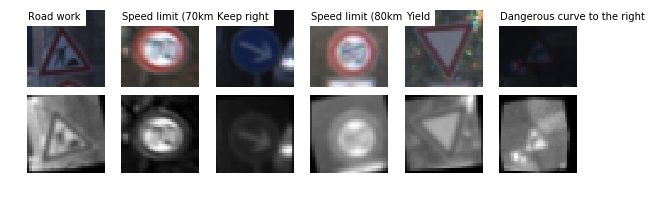

In [13]:
y_train_pro_w_names = add_label_names(y_train_pro, 'signnames.csv' , 'ClassId' )
plot_prepost_images(X_train_augm, X_train_pro, y_train_pro_w_names.values)

### Model Architecture

In [14]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [15]:
def LeNet(x, keep_prob):  
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation: RELU function
    conv1 = tf.nn.relu(conv1)

    # MaxPooling. Input = 28x28x32. Output = 14x14x32.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x64.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 32, 64), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(64))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation: RELU function
    conv2 = tf.nn.relu(conv2)

    # MaxPooling. Input = 10x10x64. Output = 5x5x64.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten. Input = 5x5x64. Output = 1600.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 1600. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    #Dropout Layer
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout Layer
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Fully Connected. Input = 84. Output = n_classes.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))    
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#### Create feature and labels

In [16]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

#### Train Pipeline

In [17]:
rate = 0.001
keep_probability = 0.5

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Model evaluation

In [18]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Train the Model

In [19]:
from sklearn.utils import shuffle

EPOCHS = 50
BATCH_SIZE = 512

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train_pro)
    
    accuracy = {'train':[], 'validation':[]}
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_pro, y_train_pro = shuffle(X_train_pro , y_train_pro)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_pro[offset:end], y_train_pro[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
        
        train_accuracy = evaluate(X_train_pro, y_train_pro)
        validation_accuracy = evaluate(X_valid_pro, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f} - Validation Accuracy = {:.3f}".format(train_accuracy,validation_accuracy))
        #print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        accuracy['train'].append(train_accuracy)
        accuracy['validation'].append(validation_accuracy)
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.714 - Validation Accuracy = 0.764

EPOCH 2 ...
Training Accuracy = 0.859 - Validation Accuracy = 0.873

EPOCH 3 ...
Training Accuracy = 0.905 - Validation Accuracy = 0.918

EPOCH 4 ...
Training Accuracy = 0.931 - Validation Accuracy = 0.927

EPOCH 5 ...
Training Accuracy = 0.949 - Validation Accuracy = 0.953

EPOCH 6 ...
Training Accuracy = 0.963 - Validation Accuracy = 0.966

EPOCH 7 ...
Training Accuracy = 0.970 - Validation Accuracy = 0.967

EPOCH 8 ...
Training Accuracy = 0.974 - Validation Accuracy = 0.961

EPOCH 9 ...
Training Accuracy = 0.973 - Validation Accuracy = 0.966

EPOCH 10 ...
Training Accuracy = 0.979 - Validation Accuracy = 0.972

EPOCH 11 ...
Training Accuracy = 0.983 - Validation Accuracy = 0.975

EPOCH 12 ...
Training Accuracy = 0.985 - Validation Accuracy = 0.980

EPOCH 13 ...
Training Accuracy = 0.987 - Validation Accuracy = 0.986

EPOCH 14 ...
Training Accuracy = 0.988 - Validation Accuracy = 0.981

EPOCH 15 ...
Tra

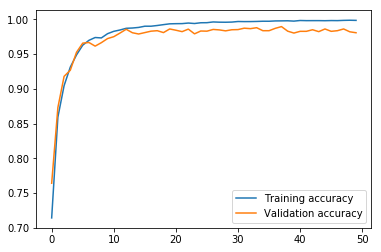

In [20]:
plt.plot(accuracy['train'], label='Training accuracy')
plt.plot(accuracy['validation'], label='Validation accuracy')
plt.legend()
#plt.ylim(ymax=1.5)

#### Evaluate model

In [21]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_pro, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.968


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [22]:
import os
TestImages = os.listdir("test-images/")

y_test_new = np.array([27, 9, 28, 17, 1], dtype=np.uint8)
X_test_new = np.empty([5,32,32,3],dtype=np.uint8)
for i in range(len(TestImages)):
    im = cv2.imread('test-images/{}'.format(TestImages[i]))
    im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
    X_test_new[i,:,:,:] = im

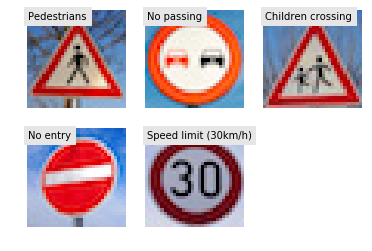

In [23]:
y_test_new_names = add_label_names(y_test_new, 'signnames.csv' , 'ClassId' )

for i,image in enumerate(TestImages):
    plt.subplot(2,3,i+1)
    image = mpimg.imread('test-images/{}'.format(TestImages[i]))
    plt.imshow(image)
    plt.text(0,0,str(y_test_new_names.values[i][1]), color='k',backgroundcolor='0.9', va='top')
    plt.axis('off')

In [24]:
X_test_new_pro = preprocess_image(X_test_new)
print ('Sample Test images has been processed.  New shape is {}'.format(X_test_new_pro.shape))

Sample Test images has been processed.  New shape is (5, 32, 32, 1)


### Predict the Sign Type for Each Image

In [25]:
prediction = tf.nn.softmax(logits)
prediction_class = tf.argmax (prediction,1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    for i in range(len(X_test_new_pro)):
        #accuracy = sess.run(accuracy_operation, feed_dict={x: X_test_new_pro[i:i+1], y: y_test_new[i:i+1]})
        predicted_class = sess.run(prediction_class,feed_dict={x: X_test_new_pro[i:i+1], keep_prob:1})
        print("Sample No {}  -- Predicted:{} - Expected:{}".format(i+1, predicted_class[0], y_test_new[i]))

Sample No 1  -- Predicted:27 - Expected:27
Sample No 2  -- Predicted:9 - Expected:9
Sample No 3  -- Predicted:28 - Expected:28
Sample No 4  -- Predicted:17 - Expected:17
Sample No 5  -- Predicted:1 - Expected:1


### Analyze Performance

In [26]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test_new_pro, y_test_new)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [27]:
top_5_pred = tf.nn.top_k(prediction, k=5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    topKV2 = sess.run(top_5_pred, feed_dict={x: X_test_new_pro, keep_prob:1})
    print(topKV2)

TopKV2(values=array([[  9.99988914e-01,   6.49421463e-06,   4.63366996e-06,
          3.26029586e-08,   2.11913917e-10],
       [  1.00000000e+00,   1.78445592e-10,   9.59454113e-11,
          4.24506025e-13,   3.70933481e-14],
       [  9.98112559e-01,   1.82019395e-03,   6.52296731e-05,
          8.04648096e-07,   6.11198971e-07],
       [  1.00000000e+00,   1.66705025e-21,   2.16446349e-27,
          4.80696045e-29,   1.83381091e-29],
       [  9.99998450e-01,   1.02037507e-06,   5.19818400e-07,
          1.17669563e-08,   1.33304212e-09]], dtype=float32), indices=array([[27, 18, 24, 11, 25],
       [ 9, 17, 15, 41, 13],
       [28, 24, 22, 20, 29],
       [17, 14, 41, 38, 39],
       [ 1,  4,  2,  0, 14]], dtype=int32))


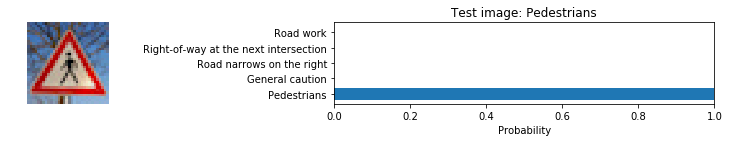

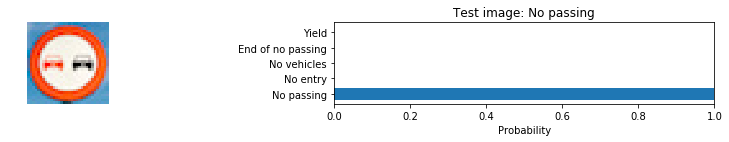

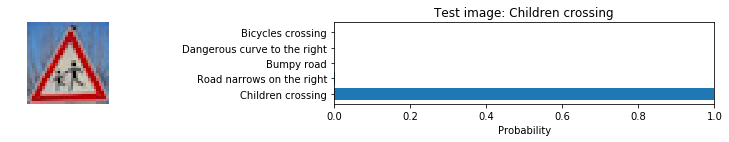

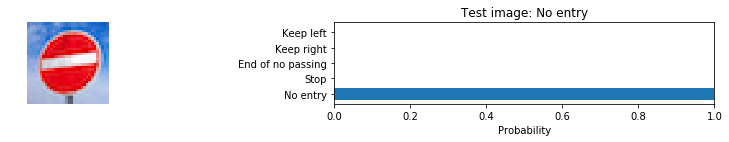

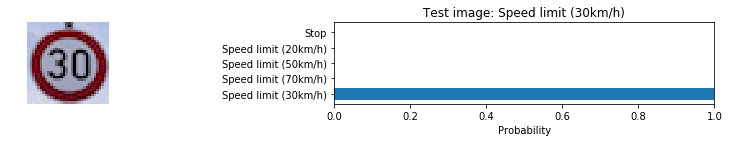

In [28]:
for i in range(len(y_test_new)):
    plt.figure(figsize = (15,1.5))
    gs = gridspec.GridSpec(1, 2)#,width_ratios=[2,3])
    plt.subplot(gs[0])
    plt.imshow(X_test_new[i], cmap="gray")
    plt.axis('off')
    plt.subplot(gs[1])
    ind = np.arange(len(y_test_new))  
    classes = topKV2[1][i]
    classes_w_names = add_label_names(classes, 'signnames.csv' , 'ClassId' )
    y = topKV2[0][i] 
    plt.barh(ind, y , align='center')#, height=0.5)
    plt.yticks(ind, classes_w_names.values[:,1])
    #plt.tick_params(axis='y', labelsize='large')
    plt.xlim(xmax=1)
    plt.xlabel('Probability')
    plt.title('Test image: {}'.format(y_test_new_names.values[i][1]))
    plt.show();